In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
import os
import glob
import pandas as pd
os.chdir("D:/ml project/refill_booking")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
print(all_filenames)
#combine all files in the list
final_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
final_csv.to_csv( "final_csv.csv", index=False, encoding='utf-8-sig')



['august-20.csv', 'july-20.csv', 'Nov-20.csv', 'oct-20.csv', 'sep-20.csv']


In [3]:
# print(final_csv.columns)
# print(final_csv.shape)

In [4]:
final_csv.dropna(subset = ["Book Date"], inplace=True)
print(final_csv.shape)

(106171, 32)


In [5]:
final_csv['freq'] = final_csv.groupby('Book Date')['Book Date'].transform('count')
# final_csv['Book Date'] = pd.to_datetime(final_csv['Book Date'])
print(final_csv[['Book Date','freq']])

data = [final_csv["Book Date"], final_csv["freq"]]
headers = ["Book Date", "freq"]
reg_df = pd.concat(data, axis=1, keys=headers)
reg_df=reg_df.drop_duplicates()
print(reg_df)

       Book Date  freq
0      7/27/2020   759
1      7/31/2020   572
2      7/31/2020   572
3      7/29/2020   682
4      7/31/2020   572
...          ...   ...
21196  9/29/2020   709
21197  9/29/2020   709
21198  9/29/2020   709
21199  9/30/2020   704
21200  9/30/2020   704

[106171 rows x 2 columns]
       Book Date  freq
0      7/27/2020   759
1      7/31/2020   572
3      7/29/2020   682
10     7/30/2020   603
21      8/1/2020   678
...          ...   ...
12253  9/18/2020   733
13048  9/19/2020   662
13785  9/20/2020   454
16294  9/24/2020   671
17024  9/25/2020   611

[164 rows x 2 columns]


In [6]:
jan=pd.read_csv('D:/jan-20.csv')
# print(type(jan['Book Date']))
# print(type(jan['freq']))
# jan['Book Date'] = pd.to_datetime(jan['Book Date'])
# print(jan.loc[jan['Book Date']=='01-02-2020'])
reg_df=pd.concat([reg_df, jan], ignore_index=True, sort=True)
# print(reg_df.loc[reg_df['Book Date']=='01-02-2020'])

In [7]:
daily_df=reg_df.copy()

import datetime as dt
daily_df['Book Date'] = pd.to_datetime(daily_df['Book Date'])
# print("oooooooooooo")
# print(reg_df)
daily_df['Book Date']=daily_df['Book Date'].map(dt.datetime.toordinal)
# print("iiiiiiiiiiii")
print(daily_df)



     Book Date  freq
0       737633   759
1       737637   572
2       737635   682
3       737636   603
4       737638   678
..         ...   ...
328     737601   723
329     737602   720
330     737603   634
331     737605   702
332     737606   845

[333 rows x 2 columns]


In [8]:
x=np.array(daily_df['Book Date']).reshape(-1,1)
y=np.array(daily_df['freq']).reshape(-1,1)

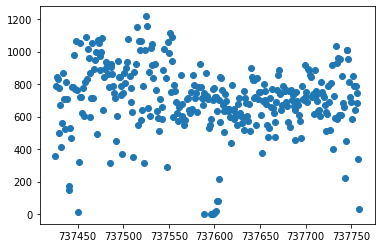

In [9]:
plt.scatter(x,y)

(333, 1) (333, 1)
(266, 1) (266, 1)


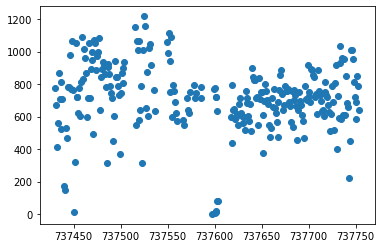

In [10]:
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor
# print(x_train.shape, y_train.shape)
# identify outliers in the training dataset
print(x.shape,y.shape)
lof = LocalOutlierFactor(n_neighbors=7,contamination=0.5)
yhat = lof.fit_predict(x)
# select all rows that are not outliers
mask = yhat != -1
x,y=x[mask],y[mask]
print(x.shape,y.shape)
plt.scatter(x,y)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)
print(x_train.shape)

(178, 1)


In [12]:
# fit the model
model1 = LinearRegression()
model1.fit(x_train, y_train)
# evaluate the model
ypred= model1.predict(x_test)
# evaluate predictions
mae1 = mean_absolute_error(y_test, ypred)
print('MAE: %.3f' % mae1)

MAE: 126.642


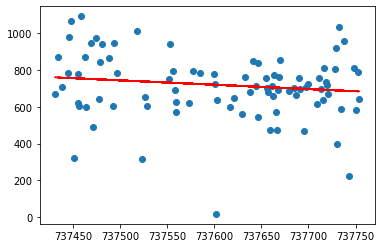

0.026636810376199582


In [13]:
y_pred=model1.predict(x_test)
plt.scatter(x_test,y_test)
plt.plot(x_test,ypred,color='red')
plt.show()
print(model1.score(x_test,y_test))

In [14]:
# d=np.array(737603).reshape(-1,1)
# print(model1.predict(d))

In [15]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# print(daily_df.sort_values(by=['Book Date']))


In [16]:
import pickle
filename='refill_booking_prediction_model.sav'
pickle.dump(model1,open(filename,'wb'))

In [17]:
loaded_model = pickle.load(open(filename, 'rb'))
d=np.array(737900).reshape(-1,1)
print(loaded_model.predict(d)+119)

[[767.42371588]]


In [18]:
print(reg_df)

     Book Date  freq
0    7/27/2020   759
1    7/31/2020   572
2    7/29/2020   682
3    7/30/2020   603
4     8/1/2020   678
..         ...   ...
328  6/25/2020   723
329  6/26/2020   720
330  6/27/2020   634
331  6/29/2020   702
332  6/30/2020   845

[333 rows x 2 columns]


In [19]:
week_df=reg_df.copy()
week_df['Book Date'] = pd.to_datetime(week_df['Book Date'])
# print(week_df)
# week_df=reg_df.groupby('Book Date').resample('W-Mon',on='Book Date').sum().reset_index().sort_values(by='Book Date)')
# print(week_df)

In [20]:
week_df['WeekDate'] = week_df.apply(lambda row: row['Book Date'] - dt.timedelta(days=row['Book Date'].weekday()), axis=1)

perweek = week_df['WeekDate'].groupby(week_df['WeekDate']).count()


In [21]:
# print(week_df.loc[week_df['WeekDate']==pd.to_datetime('1/27/2020')])
week_df1=week_df.groupby(['WeekDate'])['freq'].sum().reset_index()

week_df1['WeekDate']=week_df1['WeekDate'].map(dt.datetime.toordinal)
# print(week_df1)

    WeekDate  freq
0     737423  3322
1     737430  4513
2     737437  2838
3     737444  5154
4     737451  4812
5     737458  6178
6     737465  5801
7     737472  6705
8     737479  5556
9     737486  5389
10    737493  5124
11    737500  5323
12    737507  4169
13    737514  6339
14    737521  5776
15    737528  5302
16    737535  4124
17    737542  4272
18    737549  6540
19    737556  4096
20    737563  3840
21    737570  4080
22    737577  4516
23    737584  4557
24    737591  3967
25    737598  4520
26    737605  5737
27    737612  4395
28    737619  4423
29    737626  4291
30    737633  4519
31    737640  5367
32    737647  4727
33    737654  4489
34    737661  4459
35    737668  5245
36    737675  4997
37    737682  4610
38    737689  4416
39    737696  5281
40    737703  5549
41    737710  4946
42    737717  4820
43    737724  4730
44    737731  5443
45    737738  4428
46    737745  5780
47    737752  4837
48    737759    29


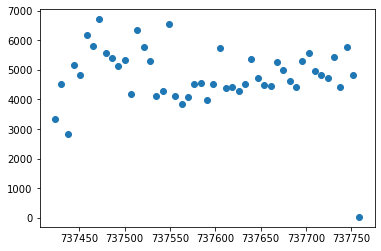

In [22]:
week_x=np.array(week_df1['WeekDate']).reshape(-1,1)
week_y=np.array(week_df1['freq']).reshape(-1,1)

plt.scatter(week_x,week_y)


In [24]:
# fit the model
model2 = LinearRegression()
model2.fit(week_x, week_y)
# evaluate the model
ypred= model2.predict(week_x)
# evaluate predictions
mae = mean_absolute_error(week_y, ypred)
print('MAE: %.3f' % mae)

MAE: 708.111


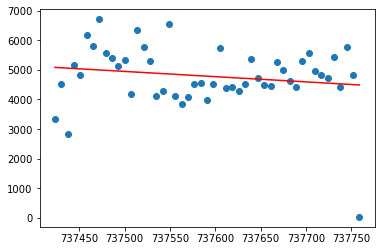

0.02862886680747012


In [25]:
y_pred=model2.predict(week_x)
plt.scatter(week_x,week_y)
plt.plot(week_x,ypred,color='red')
plt.show()
print(model2.score(week_x,week_y))

In [26]:
import pickle
filename2='refill_booking_prediction_model_week.sav'
pickle.dump(model2,open(filename2,'wb'))

In [27]:
# loaded_model = pickle.load(open(filename2, 'rb'))
# d=np.array(737100).reshape(-1,1)
# print(loaded_model.predict(d)+119)

[[5767.55106414]]
